In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Plot parameters

from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


## Plot of various consistituent power spectra at high $z$

In [3]:
# Where to save plots
plots_dir = "../paper/draft-formalism/plots/"

In [4]:
class_parameters = {'output': 'mTk,mPk',
                    'H0': 67.66,
                    'Omega_b': 0.04897,
                    'N_ur': 3.046,
                    'Omega_cdm': 0.2607,
                    'YHe': 0.245,
                    'z_reio': 7.82,
                    'n_s': 0.9665,
                    'A_s': 2.105e-9,
                    'P_k_max_1/Mpc': 500.0,
                    'perturbed recombination': 'y',
                    'non linear': 'halofit'
                    }

z_compute = 200

In [5]:
M = Class()
M.set(class_parameters)
M.set({'z_pk': z_compute})
M.compute()

h = M.h()  # get reduced Hubble for conversions to 1/Mpc

one_time = M.get_transfer(z_compute)

In [6]:
# Transfer functions

# Convert to units of Mpc^{-1}
k_ary = one_time['k (h/Mpc)'] * h

delta_b_ary = one_time['d_b']
delta_chi_ary = one_time['d_chi']

n_s = M.n_s()

# Primordial PS
k_pivot = 0.05
P_s = 2.105e-9 * (k_ary / k_pivot) ** (n_s - 1)

# Power spectra from transfer function
# In units of Mpc^3 / h^3
Pk_b_ary = P_s * (delta_b_ary) ** 2 / (k_ary ** 3 / (2 * np.pi ** 2)) * h ** 3
Pk_chi_ary = P_s * (delta_chi_ary) ** 2 / (k_ary ** 3 / (2 * np.pi ** 2)) * h **3
Pk_chi_b_ary = P_s * (delta_chi_ary * delta_b_ary) / (k_ary ** 3 / (2 * np.pi ** 2)) * h **3
Pk_tot_lin_ary = np.array([M.pk_lin(k, z_compute) * h ** 3 for k in k_ary])
Pk_tot_nonlin_ary = np.array([M.pk(k, z_compute) * h ** 3 for k in k_ary])

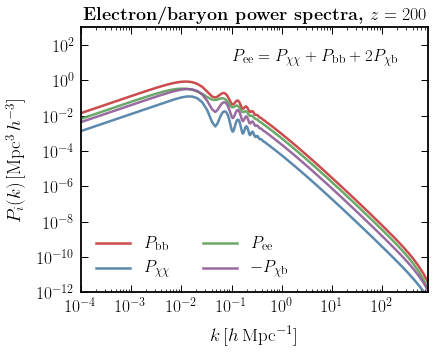

In [12]:
plt.plot(k_ary / h, Pk_b_ary, label=r"$P_\mathrm{bb}$")
plt.plot(k_ary / h, Pk_chi_ary, label=r"$P_{\chi\chi}$")
plt.plot(k_ary / h, Pk_b_ary + Pk_chi_ary + 2 * Pk_chi_b_ary, label=r"$P_\mathrm{ee}$")
plt.plot(k_ary / h, -(Pk_chi_b_ary), label=r"$-P_{\chi \mathrm b}$")

plt.xlabel("$k\,[h\,\mathrm{Mpc}^{-1}]$")
plt.ylabel("$P_i(k)$\,[Mpc$^3$\,$h^{-3}$]")

plt.xscale("log")
plt.yscale("log")

plt.xlim(1e-4, max(k_ary / h))
plt.ylim(1e-12, 1e3)

plt.text(1e-1, 1e1, r"$P_\mathrm{e e}=P_{\chi \chi}+P_\mathrm{b b}+2 P_{\chi \mathrm{b}}$", fontsize=17)
legend = plt.legend(ncol=2, loc='lower left')
plt.setp(legend.get_title(),fontsize=20)

plt.title(r"\textbf{Electron/baryon power spectra, $z=200$}")

plt.tight_layout()
plt.savefig(plots_dir + "PS_high_z.pdf")